<a href="https://colab.research.google.com/github/MashrafeeAryan/November-14-2024-Fashin-Clothes-with-CNN/blob/main/November_14%2C_2024_Fashin_Clothes_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.FashionMNIST(root='data', download = True, train = True, transform=transform)
test_data = datasets.FashionMNIST(root='data', download = True, train = False, transform=transform)

In [ ]:
train_dataloader = DataLoader(dataset=train_data, batch_size = 64, shuffle =True)
test_dataloader = DataLoader(dataset=test_data, batch_size = 64, shuffle =False)

9


Text(0.5, 1.0, 'Ankle boot')

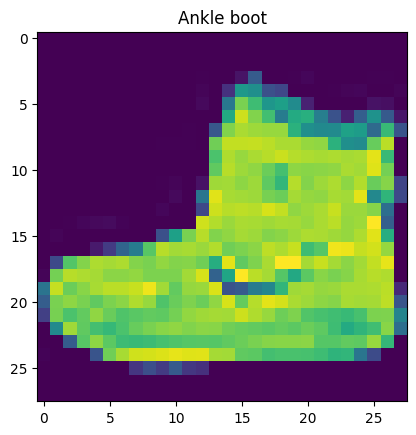

In [ ]:
image, label = train_data[0]
print(label)
plt.imshow(image.squeeze())
classes = train_data.classes
plt.title(classes[label])


Steps to Find the Input for the Linear Layer
Start with the Input Image Size:
Suppose we're using 28x28 grayscale images (e.g., MNIST or Fashion-MNIST dataset), so our initial input shape is (batch_size, 1, 28, 28).

Pass Through conv1 Layer:

self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
A convolution layer with a kernel size of 3x3, stride 1, and padding 1 keeps the spatial dimensions the same.
Output shape: (batch_size, 16, 28, 28)
Pass Through pool Layer (after conv1):

self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
Max pooling with kernel size 2x2 and stride 2 reduces each dimension by half.
Output shape after pooling: (batch_size, 16, 14, 14)
Pass Through conv2 Layer:

self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
This convolution keeps the dimensions the same because of the 3x3 kernel, stride 1, and padding 1.
Output shape: (batch_size, 32, 14, 14)
Pass Through pool Layer (after conv2):

Again, the max pooling with kernel size 2x2 and stride 2 halves the dimensions.
Output shape after pooling: (batch_size, 32, 7, 7)
Flatten the Output for the Linear Layer:

The resulting tensor after the last pooling operation has the shape (batch_size, 32, 7, 7).
To feed this into a fully connected layer, we need to flatten it to a 1D vector of size 32 * 7 * 7 = 1568.
Set Up the First nn.Linear Layer:

The input to self.fc1 should match the flattened size, 32 * 7 * 7.
So, the first fully connected layer is defined as self.fc1 = nn.Linear(32 * 7 * 7, 128).
Verification Code
To confirm these calculations programmatically, you can pass a sample tensor through the network and print the shapes:

python
Copy code
model = SimpleCNN()
sample_input = torch.randn(1, 1, 28, 28)  # Example batch of 1 grayscale 28x28 image
output = model(sample_input)

# Output shape of the last layer
print("Output shape:", output.shape)  # Expected output shape: (1, 10)

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.CNN_1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size =3, stride = 1, padding=1)
    self.CNN_2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size =3, stride=1, padding=1)
    self.CNN_3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)

    self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

    self.linear_1 = nn.Linear(64*7*7, 128)
    self.linear_2 = nn.Linear(128, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.CNN_1(x)))
    x = self.pool(F.relu(self.CNN_2(x)))
    x = F.relu(self.CNN_3(x))

    x = x.view(-1, 64 * 7 * 7)
    x = F.relu(self.linear_1(x))
    x = self.linear_2(x)
    return x





In [ ]:
model_1 = CNN()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_1.parameters(), lr=0.001)

In [ ]:
epochs = 5
for epoch in range(epochs):
  train_loss = 0
  test_loss = 0
  model_1.train()
  for image, labels in train_dataloader:
    #Forward pass
    results = model_1(image)

    #Calculate the loss
    loss = loss_func(results, labels)

    #Optimizer zero grad
    optimizer.zero_grad()

    #Loss backwards
    loss.backward()

    #Step
    optimizer.step()

    #train_loss
    train_loss += loss.item()

  model_1.eval()
  with torch.inference_mode():
    for image, labels in test_dataloader:
      results = model_1(image)
      v_loss = loss_func(results, labels)
      test_loss += v_loss.item()

  print(f"Epoch: {epoch+1}/{epochs} | Train Loss per batch: {train_loss/len(train_dataloader)} | Test Loss per batch: {test_loss/len(test_dataloader)} ")





Epoch: 1/5 | Train Loss per batch: 0.48964002277297 | Test Loss per batch: 0.3596272054751208 
Epoch: 2/5 | Train Loss per batch: 0.3079653162676007 | Test Loss per batch: 0.30565371084365117 
Epoch: 3/5 | Train Loss per batch: 0.26200109013298684 | Test Loss per batch: 0.276925380774744 
Epoch: 4/5 | Train Loss per batch: 0.2312968519252183 | Test Loss per batch: 0.2572508365105671 
Epoch: 5/5 | Train Loss per batch: 0.20670870363092753 | Test Loss per batch: 0.24620326409104523 


In [ ]:
classses = test_data.classes
accurate_images = 0
inaccurate_images = 0
for i in range(len(test_data)):
  a, b = test_data[i]
  results = model_1(a)
  prediction_index = torch.argmax(results, dim=1).item()
  predicted_label = classes[prediction_index]
  if predicted_label == classes[b]:
    accurate_images += 1
  else:
    inaccurate_images +=1
print(accurate_images, inaccurate_images)

9112 888


In [ ]:
print(accurate_images, inaccurate_images)

9112 888


In [ ]:
torch.save(model_1.state_dict(), 'model_1.pth')
